In [55]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,10)
from mpl_toolkits import mplot3d

In [56]:
import numpy as np
#les fonctions du cout
def J1 (v):
    return [np.dot(v-1,v-1), 2*(v-1)]

def J2 (v):
    N = len(v)
    gamma = np.arange(1,N+1)
    return [np.dot(v-gamma,v-gamma), 2*(v-gamma)]
    
    
def J5(v):
    l=len(v)
    a=2*np.eye(l)
    a[1:,:-1]=a[1:,:-1]+(-1)*np.eye(l-1)
    a[:-1,1:]=a[:-1,1:]+(-1)*np.eye(l-1)
    return 0.5*(np.dot((np.dot(a,v)),v))-np.dot(np.ones(l),v)+sum(v**2),np.dot(a,v)-np.ones(l)+2*v

def J6(v):
    l=len(v)
    a=2*np.eye(l)
    a[1:,:-1]=a[1:,:-1]+(-1)*np.eye(l-1)
    a[:-1,1:]=a[:-1,1:]+(-1)*np.eye(l-1)
    return 0.5*(np.dot((np.dot(a,v)),v))-np.dot(np.ones(l),v)+sum(v**4),np.dot(a,v)-np.ones(l)+4*v**3

## JR Rosenbrock
def JR (v):
    n=len(v);
    grad=np.zeros(n)
    J=(v[1:]-(v[:-1])**2)**2+(v[:-1]-1)**2
    grad[0]=-4*(v[1]-v[0]**2)*v[0]+2*(v[0]-1)
    grad[1:-1]=2*(v[1:-1]-v[:-2]**2)-4*np.multiply((v[2:]-(v[1:-1])**2),v[1:-1])+2*(v[1:-1]-1)
    grad[n-1]=2*(v[n-1]-v[n-2]**2)
    return sum(J),grad

In [57]:
def BB1(J,u_pre,pas,Kmax,eps,N):
    gu_pre=J(u_pre)[1]
    u_nxt=u_pre-pas*gu_pre
    gu_nxt=J(u_nxt)[1]
    Jk=[J(u_pre)[0],J(u_nxt)[0]]
    k=1
    while k<Kmax and np.linalg.norm(gu_nxt)>eps :
        s=u_nxt-u_pre
        y=gu_nxt-gu_pre
        pas=np.dot(s,s)/np.dot(y,s)   
        u_pre=u_nxt
        gu_pre=gu_nxt
        u_nxt=u_pre-pas*gu_pre
        gu_nxt=J(u_nxt)[1]
        Jk.append(J(u_nxt)[0])
        k=k+1
    print('nombre d iteration BB1 pour N=%d est %d'%(N,k))
    print('le minimum BB1 est: ',u_nxt)
    return u_nxt,Jk

In [58]:
def BB2(J,u_pre,pas,Kmax,eps,N):
    gu_pre=J(u_pre)[1]
    u_nxt=u_pre-pas*gu_pre
    gu_nxt=J(u_nxt)[1]
    Jk=[J(u_pre)[0],J(u_nxt)[0]]
    k=1
    while k<Kmax and np.linalg.norm(gu_nxt)>eps :
        s=u_nxt-u_pre
        y=gu_nxt-gu_pre
        pas=np.dot(s,y)/np.dot(y,y)   
        u_pre=u_nxt
        gu_pre=gu_nxt
        u_nxt=u_pre-pas*gu_pre
        gu_nxt=J(u_nxt)[1]
        Jk.append(J(u_nxt)[0])
        k=k+1
    print('nombre d iteration BB2 pour N=%d est %d'%(N,k))
    print('le minimum BB2 est: ',u_nxt)
    return u_nxt,Jk

In [59]:
def funcN(i):
    switcher={
            1:J1,
            2:J2,
            3:J5,
            4:J6,
            5:JR,
         }
    return switcher.get(i,"Invalid Number of function")

In [60]:
def prepmx(X,Y,J):
    res=np.zeros([X.shape[0],X.shape[1]])
    for i in range (X.shape[0]):
        for j in range (X.shape[1]):
            res[i,j],_=J(np.array([X[i,j],Y[i,j]]))
    return res

choisissez un num  1-J1 2-J2 3-J5 4-J6 5-JR 2


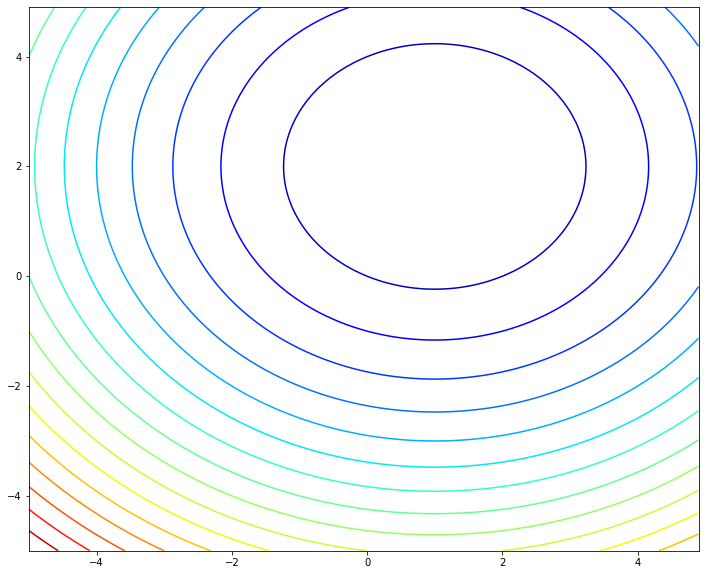

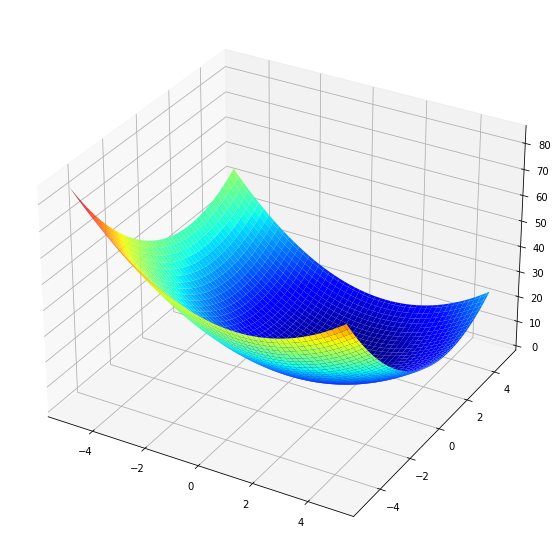

In [61]:
#MAIN
# afficher les courbes de niveaux 2D et la fonction de cout en 3D
r_min, r_max = -5.0, 5.0
xaxis = np.arange(r_min, r_max, 0.1)
yaxis = np.arange(r_min, r_max, 0.1)
x, y = np.meshgrid(xaxis, yaxis)
idx=input('choisissez un num  1-J1 2-J2 3-J5 4-J6 5-JR ')
Jidx=funcN(int(idx))
results=prepmx(x,y,Jidx)
plt.contour(x, y, results, 20, alpha=1.0, cmap='jet')
plt.show()
figure = plt.figure()
axis = figure.gca(projection='3d')
axis.plot_surface(x, y, results, cmap='jet')
plt.show()

nombre d iteration BB1 pour N=10 est 2
le minimum BB1 est:  [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
nombre d iteration BB2 pour N=10 est 2
le minimum BB2 est:  [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
nombre d iteration BB1 pour N=20 est 2
le minimum BB1 est:  [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20.]
nombre d iteration BB2 pour N=20 est 2
le minimum BB2 est:  [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20.]
nombre d iteration BB1 pour N=40 est 2
le minimum BB1 est:  [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35. 36.
 37. 38. 39. 40.]
nombre d iteration BB2 pour N=40 est 2
le minimum BB2 est:  [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35. 36.
 37. 38. 39. 40.]
nombre d iteration BB1 pour N=80 est 2
le minimum BB1 est:  [ 

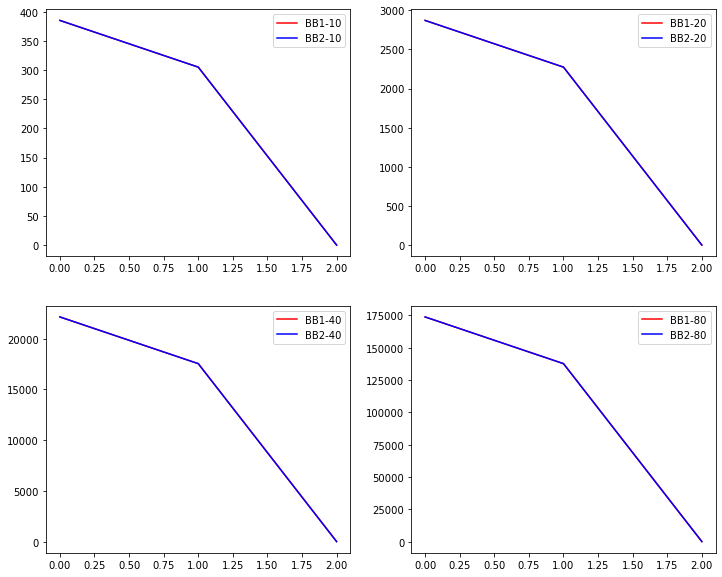

In [62]:
#afficher la fonction du cout avec les nombres d'iterations
pas,Kmax,eps=0.055,1500,1.e-7
fig,((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
_,Jk1=BB1(Jidx,np.zeros(10),pas,Kmax,eps,10)
_,Jk2=BB2(Jidx,np.zeros(10),pas,Kmax,eps,10)
ax1.plot(Jk1,'r',label='BB1-10')
ax1.plot(Jk2,'b',label='BB2-10')
ax1.legend()
_,Jk1=BB1(Jidx,np.zeros(20),pas,Kmax,eps,20)
_,Jk2=BB2(Jidx,np.zeros(20),pas,Kmax,eps,20)
ax2.plot(Jk1,'r',label='BB1-20')
ax2.plot(Jk2,'b',label='BB2-20')
ax2.legend()
_,Jk1=BB1(Jidx,np.zeros(40),pas,Kmax,eps,40)
_,Jk2=BB2(Jidx,np.zeros(40),pas,Kmax,eps,40)
ax3.plot(Jk1,'r',label='BB1-40')
ax3.plot(Jk2,'b',label='BB2-40')
ax3.legend()
_,Jk1=BB1(Jidx,np.zeros(80),pas,Kmax,eps,80)
_,Jk2=BB2(Jidx,np.zeros(80),pas,Kmax,eps,80)
ax4.plot(Jk1,'r',label='BB1-80')
ax4.plot(Jk2,'b',label='BB2-80')
ax4.legend()